In [1]:
import cPickle as pickle
import gzip
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np
from random import choice
from scipy.misc import imresize as rescale
from data_utilities import load_mnist

In [2]:
training_X, training_Y, validation_X, validation_Y, test_X, test_Y = load_mnist(shape=(28, 28))

In [3]:
def shrink(image):
    percentage = 200
    rescaled = rescale(image, percentage, interp='nearest')
    return rescaled

In [4]:
def generate_dataset(X):
    generated = []
    for point in X: generated.append(shrink(point))
    array = np.array(generated)
    array = array.reshape((len(X), 56 * 56))
    array = array.astype(np.uint8)
    return array

In [5]:
shrinked_mnist = (
    (generate_dataset(training_X), training_Y),
    (generate_dataset(validation_X), validation_Y),
    (generate_dataset(test_X), test_Y),
)

In [6]:
pickle.dump(shrinked_mnist, open('stretched_mnist/mnist', 'wb'))

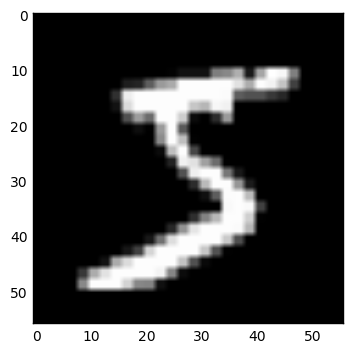

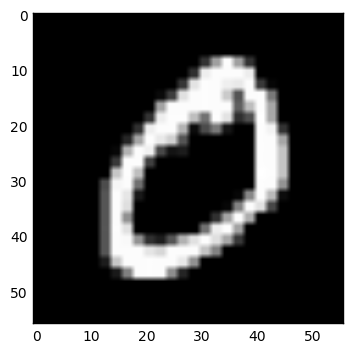

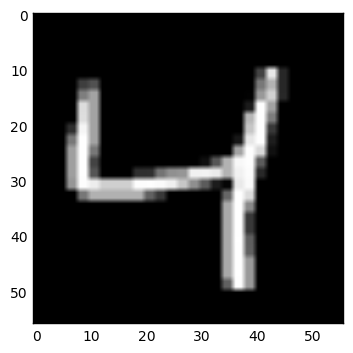

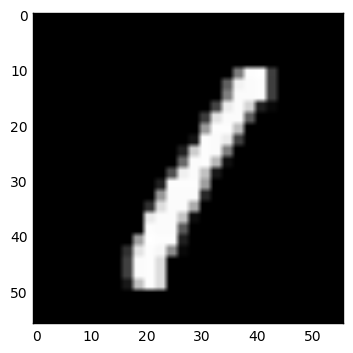

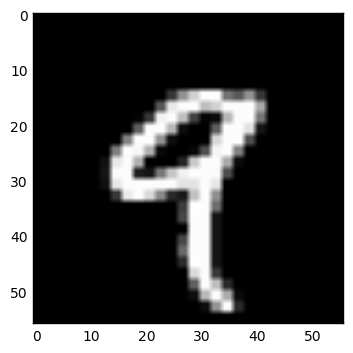

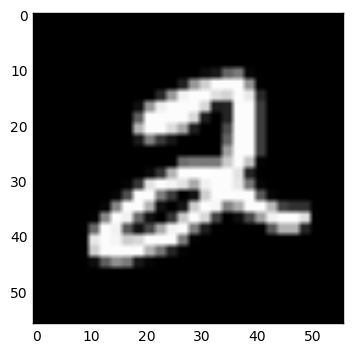

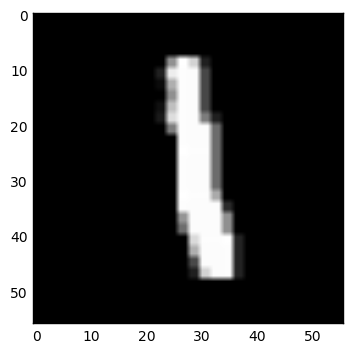

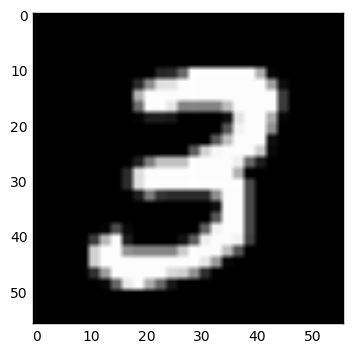

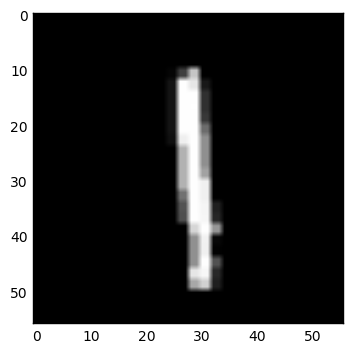

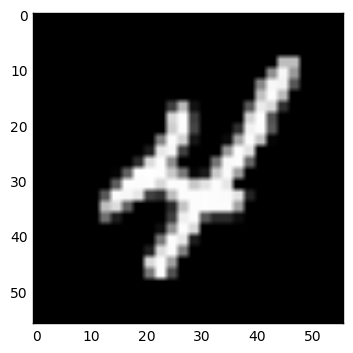

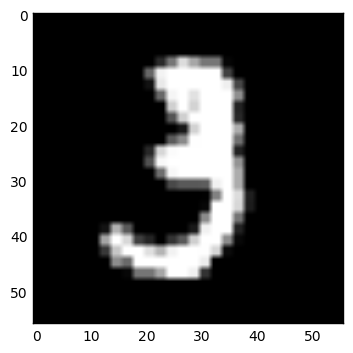

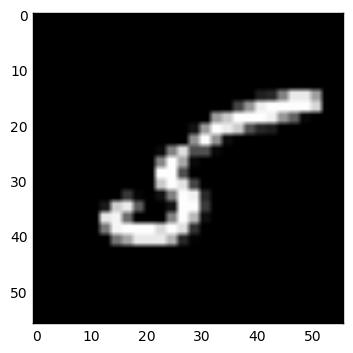

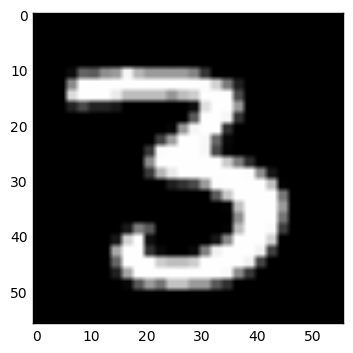

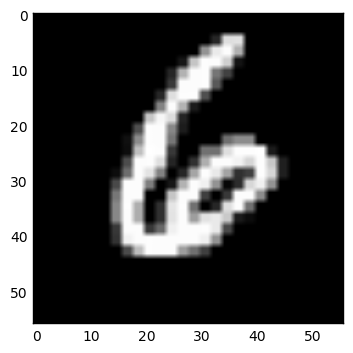

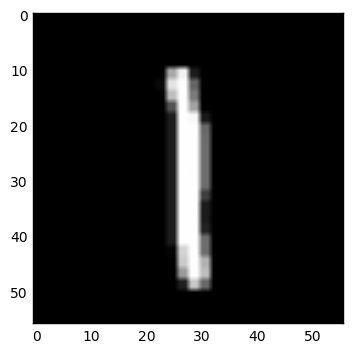

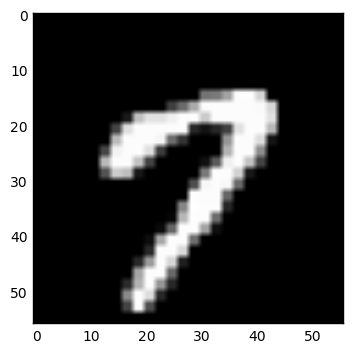

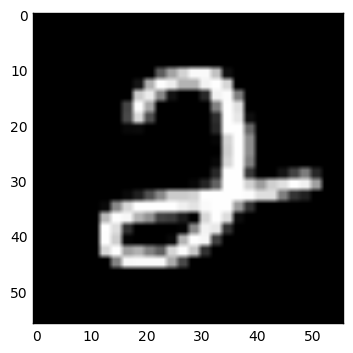

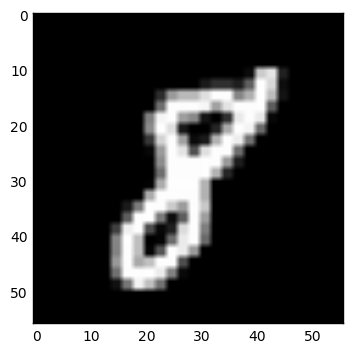

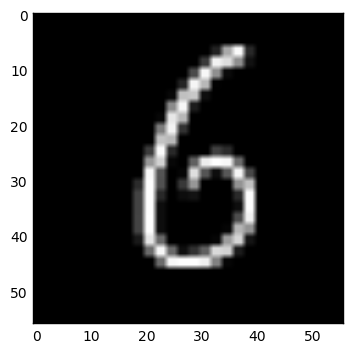

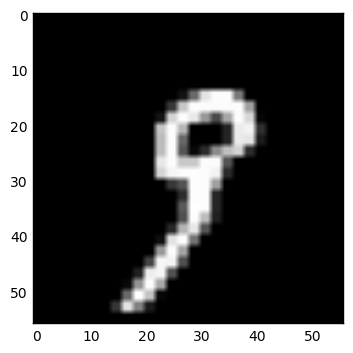

In [7]:
for image in shrinked_mnist[0][0][:20]:
    pl.figure()
    pl.imshow(image.reshape((56, 56)), cmap='gray')